# Optuna for California housing dataset

This notebook provides an example of optuna interface in `rfflearn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import IPython.display

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Prepare training, validation, and test dataset

Hyperparameter tuning requires both training and validation data. Therefore, the following code split the California housing dataset into training, validation, and test data.

In [2]:
# Load Boston Housing data from sklearn.
data = sklearn.datasets.fetch_california_housing()

# Split data to train and test.
Xs_train, Xs_test, ys_train, ys_test = sklearn.model_selection.train_test_split(data["data"], data["target"], test_size=0.2)

# Split training data to train and valid (0.25 x 0.8 = 0.2).
Xs_train, Xs_valid, ys_train, ys_valid = sklearn.model_selection.train_test_split(Xs_train, ys_train, test_size=0.25)

# Data standardization.
scaler   = sklearn.preprocessing.StandardScaler().fit(Xs_train)
Xs_train = scaler.transform(Xs_train)
Xs_valid = scaler.transform(Xs_valid)
Xs_test  = scaler.transform(Xs_test)

### Run hyperparameter tuning

In [3]:
# Define range of hyper parameters to be tuned.
RANGE_DIM_KERNEL = {"low": 16, "high": 512}
RANGE_STD_KERNEL = {"low": 1.0E-3, "high": 10.0}

# Define the number of trials.
n_trials = 50

# Fix seed for random fourier feature calclation
rfflearn.seed(111)

# Hyper parameter tuning.
# The returned value `study` contains the results of hyper parameter tuning,
# including the best parameters (study.best_params) and best model (= study.user_attrs["best_model"]).
study = rfflearn.RFFRegressor_tuner(train_set=(Xs_train, ys_train),
                                    valid_set=(Xs_valid, ys_valid),
                                    range_dim_kernel=RANGE_DIM_KERNEL,
                                    range_std_kernel=RANGE_STD_KERNEL,
                                    n_trials=n_trials,
                                    n_jobs=-1,
                                    verbose=4)

[I 2024-10-22 21:33:50,269] A new study created in memory with name: no-name-dd7912c9-2059-493f-87a4-1dcb72c392c3
[I 2024-10-22 21:33:50,791] Trial 0 finished with value: -0.036385265596724725 and parameters: {'dim_kernel': 493, 'std_kernel': 7.29901053671414}. Best is trial 0 with value: -0.036385265596724725.
[I 2024-10-22 21:33:51,084] Trial 1 finished with value: 0.17262204374510715 and parameters: {'dim_kernel': 310, 'std_kernel': 3.4588139478699857}. Best is trial 1 with value: 0.17262204374510715.
[I 2024-10-22 21:33:51,291] Trial 2 finished with value: -0.01400023140593909 and parameters: {'dim_kernel': 214, 'std_kernel': 6.773015662843862}. Best is trial 1 with value: 0.17262204374510715.
[I 2024-10-22 21:33:51,455] Trial 3 finished with value: 0.08094340116413701 and parameters: {'dim_kernel': 177, 'std_kernel': 3.3701896353635834}. Best is trial 1 with value: 0.17262204374510715.
[I 2024-10-22 21:33:52,014] Trial 4 finished with value: -0.03015558367873039 and parameters: {'

### Print best parameters, best score, and best model instance

In [4]:
# Show the result of the hyper parameter tuning.
print("- study.best_params:", study.best_params)
print("- study.best_value:",  study.best_value)
print("- study.best_model:",  study.user_attrs["best_model"])

- study.best_params: {'dim_kernel': 512, 'std_kernel': 0.8301298145273339}
- study.best_value: 0.7431228964332457
- study.best_model: <rfflearn.cpu.rfflearn_cpu_regression.RFFRegressor object at 0x00000253AC2D60C0>


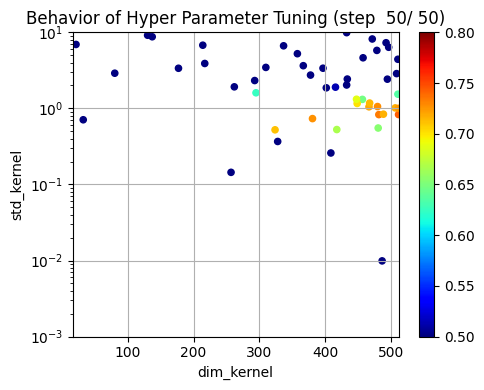

In [5]:
# Create plotting contents, where
#  - xs: parameter 1 (dim_kernel of RFFRegression)
#  - ys: parameter 2 (std_kernel of RFFRegression)
#  - zs: R2 score of the model.
xs = np.array([trial.params["dim_kernel"] for trial in study.get_trials()])
ys = np.array([trial.params["std_kernel"] for trial in study.get_trials()])
zs = np.array([max(0, trial.value)        for trial in study.get_trials()])

for idx in range(len(xs)):
    plt.figure(figsize=(5, 4))
    plt.title("Behavior of Hyper Parameter Tuning (step %3d/%3d)" % (idx + 1, len(xs)))
    plt.xlabel("dim_kernel")
    plt.ylabel("std_kernel")
    plt.scatter(xs[:idx+1], ys[:idx+1], 20, zs[:idx+1], cmap="jet", vmin=0.5, vmax=0.8)
    plt.xlim((RANGE_DIM_KERNEL["low"], RANGE_DIM_KERNEL["high"]))
    plt.ylim((RANGE_STD_KERNEL["low"], RANGE_STD_KERNEL["high"]))
    plt.yscale("log")
    plt.colorbar()
    plt.grid(True)
    plt.tight_layout()
    plt.pause(0.1)
    IPython.display.clear_output(wait=True)